<a href="https://colab.research.google.com/github/Vaibhav-arya/Industrial_accident_Causal_analysis/blob/main/Industrial_accident_causal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading Dataset


In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/gauravpks/ml-repo/master/IndustrialSafetyDS/industrial_safety.csv")

In [76]:
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      424 non-null    object
 1   Countries                 424 non-null    object
 2   Local                     424 non-null    object
 3   Industry Sector           424 non-null    object
 4   Accident Level            424 non-null    object
 5   Potential Accident Level  424 non-null    object
 6   Gender                    424 non-null    object
 7   Employee or Third Party   424 non-null    object
 8   Critical Risk             424 non-null    object
 9   Description               424 non-null    object
dtypes: object(10)
memory usage: 33.2+ KB


In [78]:
df.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [79]:
df.columns = ['Date','Country','Local','Industry Sector','Accident level','Potential Accient Level','Gender','Employee','Critical Risk','Description']

In [80]:
df.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident level',
       'Potential Accient Level', 'Gender', 'Employee', 'Critical Risk',
       'Description'],
      dtype='object')

#Pre-processing

Adding datetime features such as year,month and day

In [81]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df.head(3)

,Date,Country,Local,Industry Sector,Accident level,Potential Accient Level,Gender,Employee,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     424 non-null    datetime64[ns]
 1   Country                  424 non-null    object        
 2   Local                    424 non-null    object        
 3   Industry Sector          424 non-null    object        
 4   Accident level           424 non-null    object        
 5   Potential Accient Level  424 non-null    object        
 6   Gender                   424 non-null    object        
 7   Employee                 424 non-null    object        
 8   Critical Risk            424 non-null    object        
 9   Description              424 non-null    object        
 10  Year                     424 non-null    int64         
 11  Month                    424 non-null    int64         
 12  Day                      424 non-nul

Accordin to this discussion, countries are from North America. As per knowledge there are four climatological seasons as below. Spring : September to November Summer : December to February Autumn : March to May Winter : June to August We can create seasonal variable based on month variable.

In [83]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [84]:
df['Season'] = df['Month'].apply(month2seasons)
df.head(3)

,Date,Country,Local,Industry Sector,Accident level,Potential Accient Level,Gender,Employee,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter


#Exploratory Data Analysis

Accident by country

In [85]:
df_contry=df['Country'].value_counts(normalize=True)
df_contry


United States     0.591981
Canada            0.304245
Mexico            0.103774
Name: Country, dtype: float64

In [86]:
percentage=np.round((df_contry*100))
percentage

United States     59.0
Canada            30.0
Mexico            10.0
Name: Country, dtype: float64

In [87]:
df_contry.values

array([0.59198113, 0.30424528, 0.10377358])

In [88]:
df_contry.keys().values

array(['United States ', 'Canada', 'Mexico'], dtype=object)

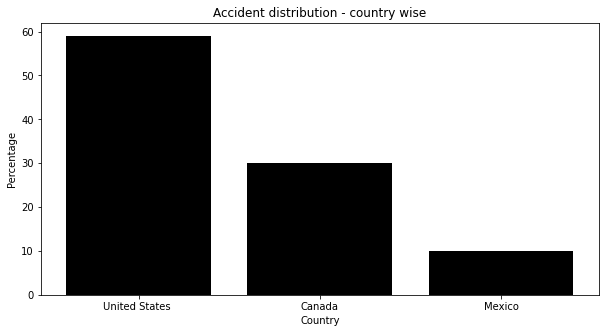

In [89]:
fig1=plt.figure(figsize=(10,5))
plt.bar(df_contry.keys().values,percentage,color='black',
              width=0.8)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Accident distribution - country wise')
plt.show()


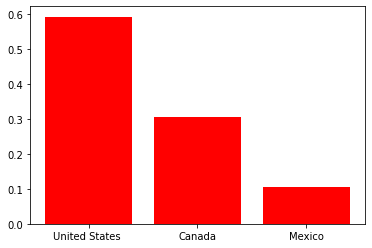

In [90]:
plt.bar(df_contry.keys().values,df_contry.values,color='red');

In [91]:
df_us=df[df['Country']=='United States ']
df_us

,Date,Country,Local,Industry Sector,Accident level,Potential Accient Level,Gender,Employee,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter
3,2016-08-01,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Winter
4,2016-10-01,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Spring
7,2016-01-17,United States,Illinois,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic...",2016,1,17,Sunday,2,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2017-06-20,United States,West Virginia,Mining,I,IV,Male,Third Party,Others,"In circumstance, the AHK-903 license plate (Em...",2017,6,20,Tuesday,25,Winter
413,2017-06-24,United States,Kentucky,Mining,I,II,Female,Third Party,Cut,"On the surface, Comedor the worker of the comp...",2017,6,24,Saturday,25,Winter
419,2017-04-07,United States,Illinois,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,4,7,Friday,14,Autumn
420,2017-04-07,United States,Kentucky,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,4,7,Friday,14,Autumn


Accident by local 

In [92]:
us_local=df_us['Local'].value_counts(normalize=True)
us_local

Kentucky         0.358566
West Virginia    0.227092
Illinois         0.223108
Pennsylvania     0.183267
Montana          0.007968
Name: Local, dtype: float64

In [93]:
percentage1=np.round((us_local)*100)
percentage1

Kentucky         36.0
West Virginia    23.0
Illinois         22.0
Pennsylvania     18.0
Montana           1.0
Name: Local, dtype: float64

In [94]:
us_local.keys().values

array(['Kentucky', 'West Virginia', 'Illinois', 'Pennsylvania', 'Montana'],
      dtype=object)

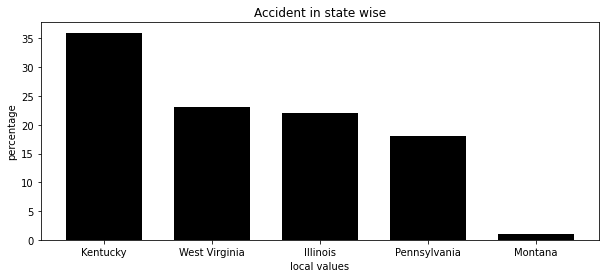

In [95]:
fig3=plt.figure(figsize=(10,4))
plt.bar(us_local.keys().values,percentage1,color='black',
                    width=0.7)
plt.xlabel('local values')
plt.ylabel('percentage')
plt.title('Accident in state wise')
plt.show();

Accident by Industry sector

In [96]:
us_Is=df_us['Industry Sector'].value_counts(normalize=True)
us_Is


Mining    0.808765
Metals    0.183267
Others    0.007968
Name: Industry Sector, dtype: float64

In [97]:
percentage3=np.round((us_Is)*100)
percentage3

Mining    81.0
Metals    18.0
Others     1.0
Name: Industry Sector, dtype: float64

In [98]:
us_Is.keys().values

array(['Mining', 'Metals', 'Others'], dtype=object)

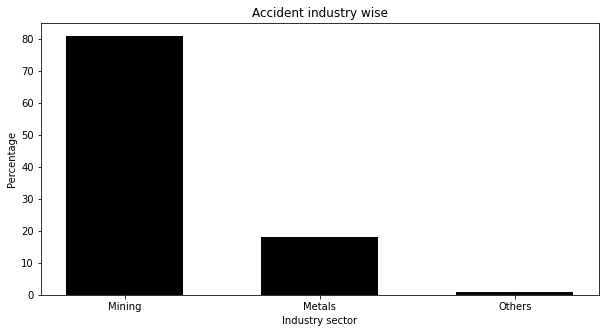

In [99]:
fig4=plt.figure(figsize=(10,5))
plt.bar(us_Is.keys().values,percentage3,color='black',
                     width=0.6)
plt.xlabel('Industry sector')
plt.ylabel('Percentage')
plt.title('Accident industry wise')
plt.show()

Accident in sector wise

In [100]:
us_Al=df_us['Accident level'].value_counts(normalize=True)
us_Al

I      0.717131
IV     0.091633
III    0.083665
II     0.075697
V      0.031873
Name: Accident level, dtype: float64

In [101]:
percentage4=np.round((us_Al)*100)
percentage4

I      72.0
IV      9.0
III     8.0
II      8.0
V       3.0
Name: Accident level, dtype: float64

In [102]:
us_Al.keys().values

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

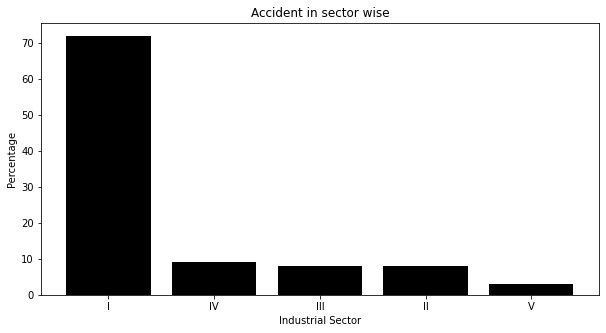

In [103]:
fig5=plt.figure(figsize=(10,5))
plt.bar(us_Al.keys().values,percentage4,color='black',
                width=0.8)
plt.xlabel('Industrial Sector')
plt.ylabel('Percentage')
plt.title('Accident in sector wise')
plt.show()


Accident in potential wise 

In [104]:
us_pa=df_us['Potential Accient Level'].value_counts(normalize=True)
us_pa

IV     0.410359
III    0.254980
II     0.203187
V      0.087649
I      0.039841
VI     0.003984
Name: Potential Accient Level, dtype: float64

In [105]:
percentage5=np.round((us_pa)*100)
percentage5

IV     41.0
III    25.0
II     20.0
V       9.0
I       4.0
VI      0.0
Name: Potential Accient Level, dtype: float64

In [106]:
us_pa.keys().values

array(['IV', 'III', 'II', 'V', 'I', 'VI'], dtype=object)

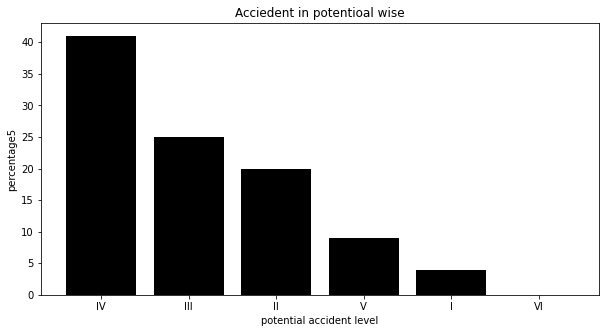

In [107]:
fig6=plt.figure(figsize=(10,5))
plt.bar(us_pa.keys().values,percentage5,color='black',
                width=0.8)
plt.xlabel('potential accident level')
plt.ylabel('percentage5')
plt.title('Acciedent in potentioal wise')
plt.show()


Accident in Gender wise

In [108]:
us_gen = df_us['Gender'].value_counts(normalize=True)
us_gen

Male      0.972112
Female    0.027888
Name: Gender, dtype: float64

In [109]:
us_gen.keys().values

array(['Male', 'Female'], dtype=object)

In [110]:
percentage6=np.round((us_gen)*100)
percentage6

Male      97.0
Female     3.0
Name: Gender, dtype: float64

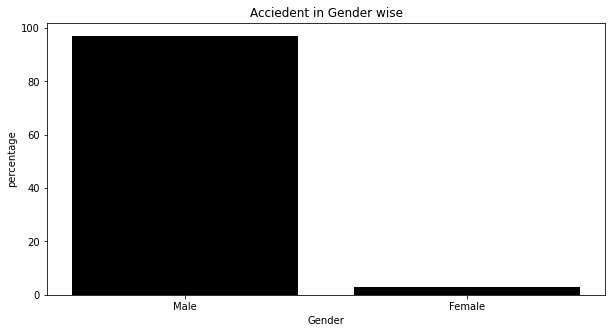

In [111]:
fig7=plt.figure(figsize=(10,5))
plt.bar(us_gen.keys().values,percentage6,color='black',
                width=0.8)
plt.xlabel('Gender')
plt.ylabel('percentage')
plt.title('Acciedent in Gender wise')
plt.show()

Accident in Employee wise

In [112]:
us_emp=df_us['Employee'].value_counts(normalize=True)
us_emp



Third Party             0.553785
Employee                0.350598
Third Party (Remote)    0.095618
Name: Employee, dtype: float64

In [113]:
percentage7=np.round((us_emp)*100)
percentage7

Third Party             55.0
Employee                35.0
Third Party (Remote)    10.0
Name: Employee, dtype: float64

In [114]:
us_emp.keys().values

array(['Third Party', 'Employee', 'Third Party (Remote)'], dtype=object)

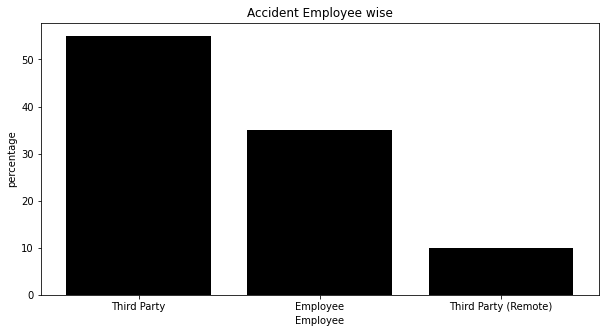

In [115]:
fig8=plt.figure(figsize=(10,5))
plt.bar(us_emp.keys().values,percentage7,color='black',
               width=0.8)
plt.xlabel('Employee')
plt.ylabel('percentage')
plt.title('Accident Employee wise')
plt.show()

By accident level

In [116]:
acc_count=np.round((df['Accident level'].value_counts(normalize=True))*100,decimals=1)
acc_count

I      74.3
II      9.4
III     7.3
IV      7.1
V       1.9
Name: Accident level, dtype: float64

In [117]:
pot_count=np.round((df['Potential Accient Level'].value_counts(normalize=True))*100,decimals=1)
pot_count

IV     33.7
III    25.0
II     22.2
I      11.6
V       7.3
VI      0.2
Name: Potential Accient Level, dtype: float64

In [118]:
acc_count.values

array([74.3,  9.4,  7.3,  7.1,  1.9])

In [119]:
h1=np.append(acc_count.to_numpy(),0)
h1

array([74.3,  9.4,  7.3,  7.1,  1.9,  0. ])

In [120]:
np.arange(len(h1))

array([0, 1, 2, 3, 4, 5])

In [121]:
barwidth=0.25
[x+barwidth for x in np.arange(len(h1))]

[0.25, 1.25, 2.25, 3.25, 4.25, 5.25]

In [122]:
idx=[3,2,1,0,4,5]
pot_count.to_numpy()[idx]

array([11.6, 22.2, 25. , 33.7,  7.3,  0.2])

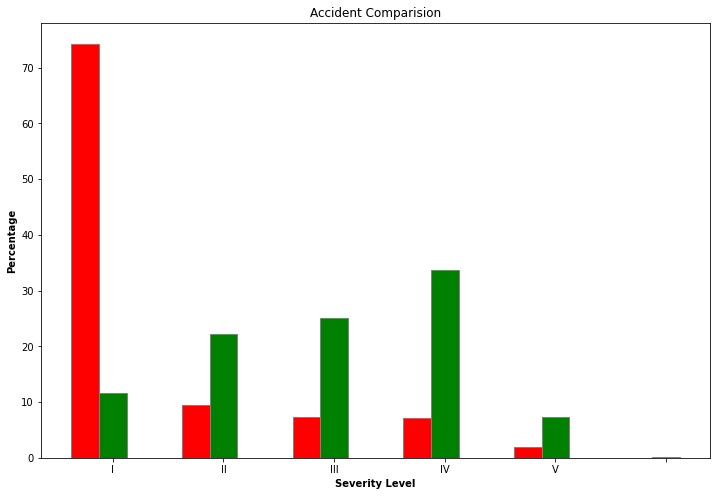

In [123]:
barwidth=0.25
fig=plt.subplots(figsize=(12,8))
idx=[3,2,1,0,4,5]
h1=np.append(acc_count.to_numpy(),0)
h2=pot_count.to_numpy()[idx]
bar1=np.arange(len(h1))
bar2=[x+barwidth for x in bar1]
plt.bar(bar1,h1,color='red',width=barwidth,
                edgecolor='grey',label='Accident Level')
plt.bar(bar2,h2,color='g',width=barwidth,
        edgecolor='grey',label='Potential Accident Level')
plt.xlabel('Severity Level', fontweight ='bold') 
plt.ylabel('Percentage', fontweight ='bold') 
plt.xticks([r + barwidth for r in range(len(bar1))], 
           acc_count.keys().values) 
plt.title("Accident Comparision")   
plt.show()

In [124]:
df

,Date,Country,Local,Industry Sector,Accident level,Potential Accient Level,Gender,Employee,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter
3,2016-08-01,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Winter
4,2016-10-01,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2017-04-07,United States,Illinois,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,4,7,Friday,14,Autumn
420,2017-04-07,United States,Kentucky,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,4,7,Friday,14,Autumn
421,2017-05-07,Canada,Quebec,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,5,7,Sunday,18,Autumn
422,2017-06-07,Canada,British Columbia,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,6,7,Wednesday,23,Winter


In [125]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
remains of choco                               7
Fall prevention (same level)                   7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Blocking and isolation of energies             3
Projection of fragments                        2
Electrical Shock    

In [126]:
df_CrR=np.round(df['Critical Risk'].value_counts(normalize=True)*100,decimals=2)
df_CrR

Others                                       54.72
Pressed                                       5.66
Manual Tools                                  4.72
Chemical substances                           4.01
Venomous Animals                              3.77
Cut                                           3.30
Projection                                    3.07
Bees                                          2.36
Fall                                          2.12
Vehicles and Mobile Equipment                 1.89
remains of choco                              1.65
Fall prevention (same level)                  1.65
Pressurized Systems                           1.65
Fall prevention                               1.42
Suspended Loads                               1.42
Pressurized Systems / Chemical Substances     0.71
Power lock                                    0.71
Liquid Metal                                  0.71
Blocking and isolation of energies            0.71
Projection of fragments        

In [127]:
df_CrR.values

array([54.72,  5.66,  4.72,  4.01,  3.77,  3.3 ,  3.07,  2.36,  2.12,
        1.89,  1.65,  1.65,  1.65,  1.42,  1.42,  0.71,  0.71,  0.71,
        0.71,  0.47,  0.47,  0.47,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24])

In [128]:
df_CrR.to_numpy()

array([54.72,  5.66,  4.72,  4.01,  3.77,  3.3 ,  3.07,  2.36,  2.12,
        1.89,  1.65,  1.65,  1.65,  1.42,  1.42,  0.71,  0.71,  0.71,
        0.71,  0.47,  0.47,  0.47,  0.24,  0.24,  0.24,  0.24,  0.24,
        0.24,  0.24,  0.24,  0.24,  0.24])

In [129]:
df_CrR.keys().values

array(['Others', 'Pressed', 'Manual Tools', 'Chemical substances',
       'Venomous Animals', 'Cut', 'Projection', 'Bees', 'Fall',
       'Vehicles and Mobile Equipment', 'remains of choco',
       'Fall prevention (same level)', 'Pressurized Systems',
       'Fall prevention', 'Suspended Loads',
       'Pressurized Systems / Chemical Substances', 'Power lock',
       'Liquid Metal', 'Blocking and isolation of energies',
       'Projection of fragments', 'Electrical Shock',
       'Machine Protection', 'Burn', 'Individual protection equipment',
       'Confined space', 'Projection/Burning', 'Poll',
       'Projection/Manual Tools', '\nNot applicable',
       'Electrical installation', 'Projection/Choco', 'Plates'],
      dtype=object)

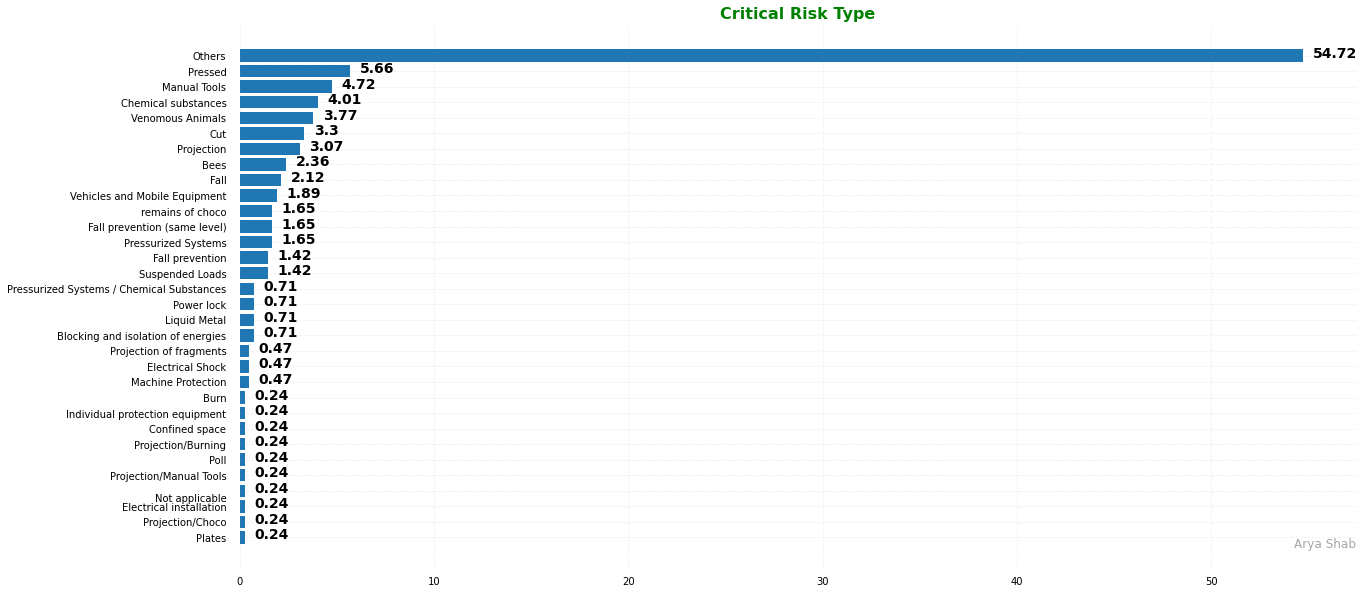

In [130]:
fig,ax=plt.subplots(figsize=(20,10))
ax.barh(df_CrR.keys().values,df_CrR.to_numpy())

for s in ['top', 'bottom', 'left', 'right']: 
  ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey', 
		linestyle ='-.', linewidth = 0.5, 
		alpha = 0.2)
ax.invert_yaxis()

for i in ax.patches: 
	plt.text(i.get_width()+0.5, i.get_y()+0.5, 
			str(round((i.get_width()), 2)), 
			fontsize = 14, fontweight ='bold', 
			color ='black') 

ax.set_title('Critical Risk Type', 
			loc ='center', fontsize = 16, fontweight = "bold", color = "Green" )

fig.text(0.9, 0.15, 'Arya Shab', fontsize = 12, 
		color ='grey', ha ='right', va ='bottom', 
		alpha = 0.7);
plt.show()   

Gender By country

In [131]:
f = lambda x : np.round((x/x.sum() * 100))
gen_cnt = df.groupby(['Gender','Country'])['Country'].count().unstack().apply(f, axis=0)

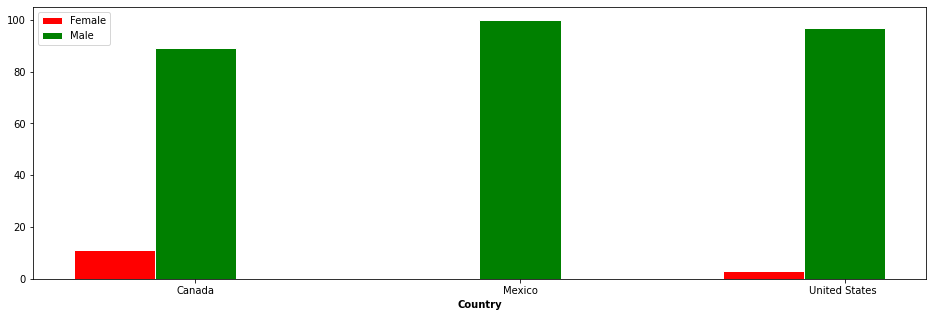

In [132]:
fig = plt.figure(figsize = (16, 5))
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = gen_cnt.to_numpy()[0]
bars2 = gen_cnt.to_numpy()[1]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=gen_cnt['Canada'].keys().values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=gen_cnt['Canada'].keys().values[1])
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], gen_cnt.columns.values)
 
# Create legend & Show graphic
plt.legend()
plt.show()

Industry by country

In [133]:
f = lambda x : np.round(x/x.sum() * 100)
con_sector = df.groupby(['Country','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)

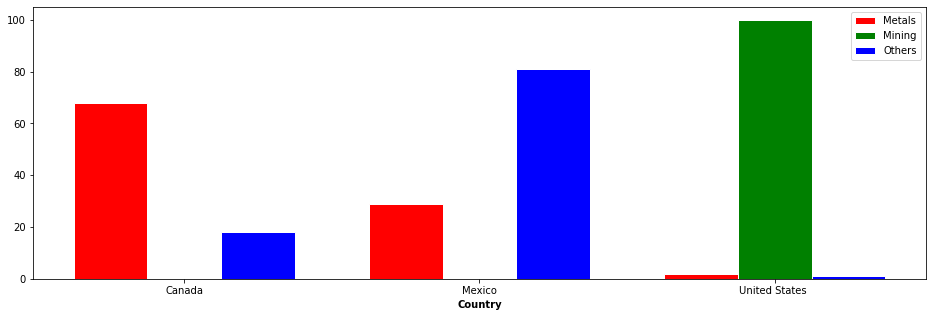

In [134]:
fig = plt.figure(figsize = (16, 5))
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = con_sector.to_numpy()[0]
bars2 = con_sector.to_numpy()[1]
bars3 = con_sector.to_numpy()[2]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=con_sector.columns.values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=con_sector.columns.values[1])
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label=con_sector.columns.values[2])
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], con_sector['Metals'].keys().values)
 
# Create legend & Show graphic
plt.legend()
plt.show()


Gender By employ type

In [135]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = df.groupby(['Gender','Employee'])['Employee'].count().unstack().apply(f, axis=0)

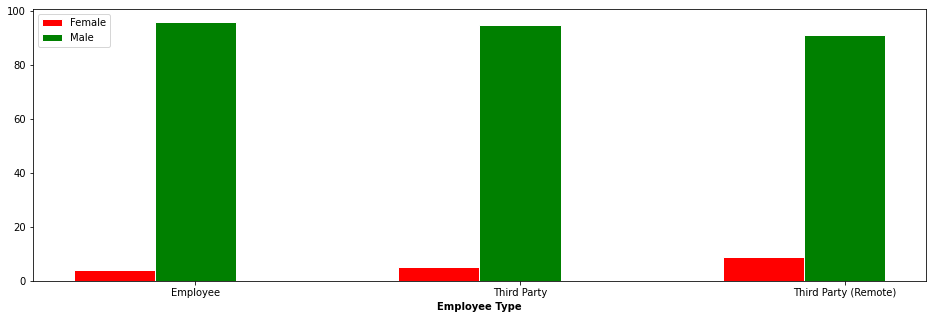

In [136]:
fig = plt.figure(figsize = (16, 5))
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = em_gen.to_numpy()[0]
bars2 = em_gen.to_numpy()[1]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=em_gen['Employee'].keys().values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=em_gen['Employee'].keys().values[1])
 
# Add xticks on the middle of the group bars
plt.xlabel('Employee Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], em_gen.columns.values)
 
# Create legend & Show graphic
plt.legend()
plt.show()

Accident count by month

In [137]:
f = lambda x : np.round(x/x.sum() * 100)
ac_mo = df.groupby(['Month','Accident level'])['Accident level'].count().unstack().apply(f, axis=1).fillna(0)

In [138]:
ac_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       12 non-null     float64
 1   II      12 non-null     float64
 2   III     12 non-null     float64
 3   IV      12 non-null     float64
 4   V       12 non-null     float64
dtypes: float64(5)
memory usage: 576.0 bytes


In [139]:

ac_mo.reset_index(level=0, inplace=True)

In [140]:
ac_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   12 non-null     int64  
 1   I       12 non-null     float64
 2   II      12 non-null     float64
 3   III     12 non-null     float64
 4   IV      12 non-null     float64
 5   V       12 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 704.0 bytes


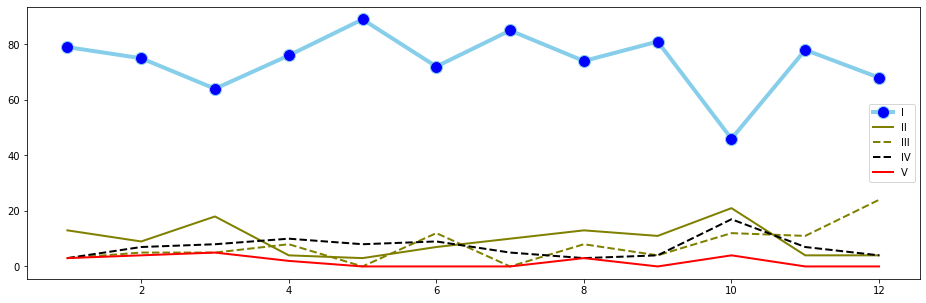

In [141]:
# multiple line plot
fig = plt.figure(figsize = (16, 5))
plt.plot( 'Month', 'I', data=ac_mo, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Month', 'II', data=ac_mo, marker='', color='olive', linewidth=2)
plt.plot( 'Month', 'III', data=ac_mo, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.plot( 'Month', 'IV', data=ac_mo, marker='', color='black', linewidth=2, linestyle='dashed')
plt.plot( 'Month', 'V', data=ac_mo, marker='', color='red', linewidth=2)
plt.legend();

Word Cloud

In [142]:

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

In [143]:
comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.update(["employee", "operator"])

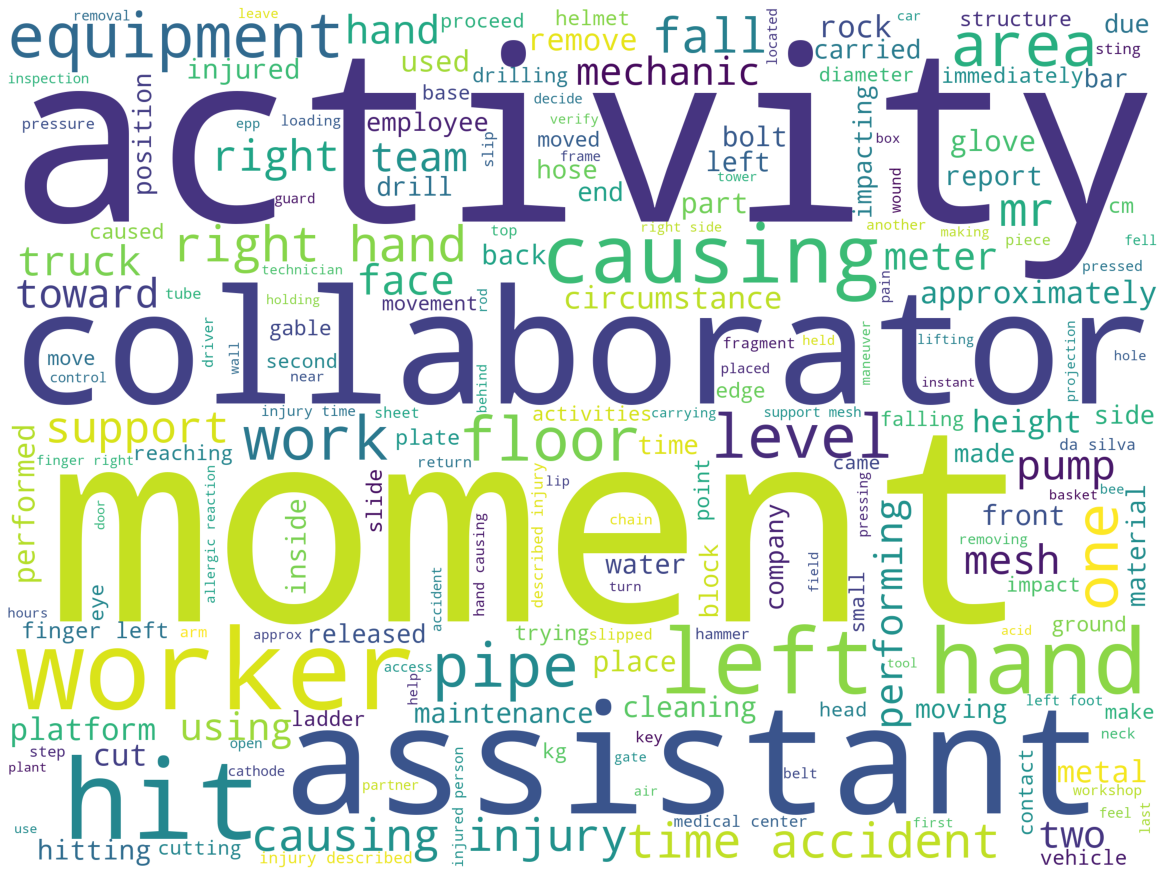

In [144]:
# iterate through the csv file 
for val in df.Description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2400, height = 1800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()